<a href="https://colab.research.google.com/github/LifeLeveller/PORTFOLIO/blob/main/Matplotlib_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Data Visualization with Matplotlib
Datacamp Dataset- Visualizing data in plots and figures exposes the underlying patterns in the data and provides insights. Good visualizations also help you communicate your data to others, and are useful to data analysts and other consumers of the data. In this course, you will learn how to use Matplotlib, a powerful Python data visualization library. Matplotlib provides the building blocks to create rich visualizations of many different kinds of datasets. You will learn how to create visualizations for different kinds of data and how to customize, automate, and share these visualizations.

https://www.datacamp.com/statement-of-accomplishment/course/89185276cb07cda29698815bbebbb4cef425cbb9

##Using the matplotlib.pyplot interface

In [ ]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Call the show function to show the result
plt.show() # an empty set of axes

##Adding data to an Axes object

In [ ]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax.plot(seattle_weather["MONTH"], seattle_weather['MLY-PRCP-NORMAL'])

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(austin_weather["MONTH"], austin_weather['MLY-PRCP-NORMAL'])

# Call the show function
plt.show()

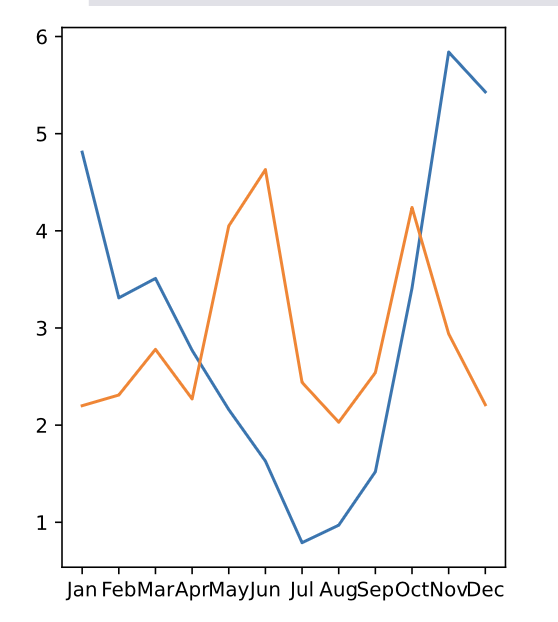

## Customizing your plots

###Customizing data appearance

In [ ]:
# Plot Seattle data, setting data appearance
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color='b', marker='o', linestyle='--') # circle markers ('o')

# Plot Austin data, setting data appearance
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color='r', marker='v', linestyle='--') # triangles pointing downwards ('v')

# Call show to display the resulting plot
plt.show()

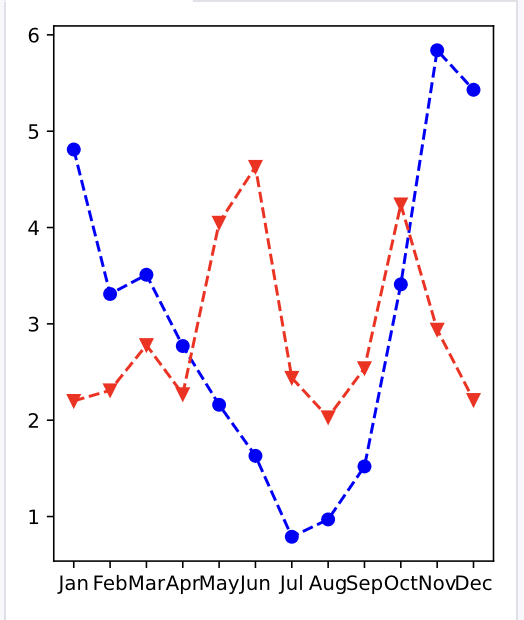

###Customizing axis labels and adding titles

In [ ]:
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# Customize the x-axis label
ax.set_xlabel("Time (months)")

# Customize the y-axis label
ax.set_ylabel("Precipitation (inches)")

# Add the title
ax.set_title("Weather patterns in Austin and Seattle")

# Display the figure
plt.show()

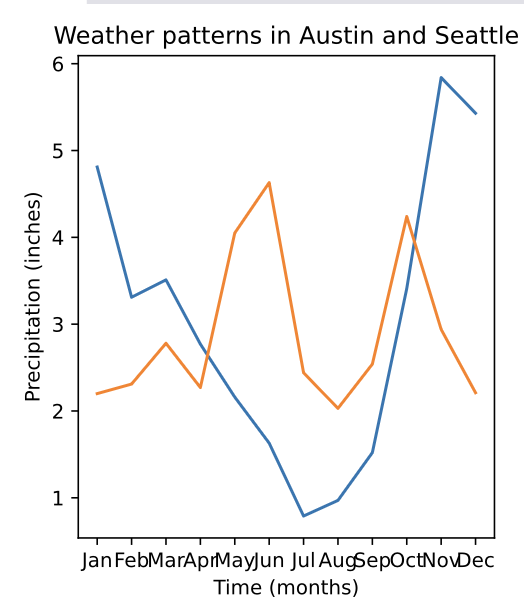

## Small Multiples

###Creating small multiples with plt.subplots

In [ ]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1,0].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1,1].plot(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'])
plt.show()

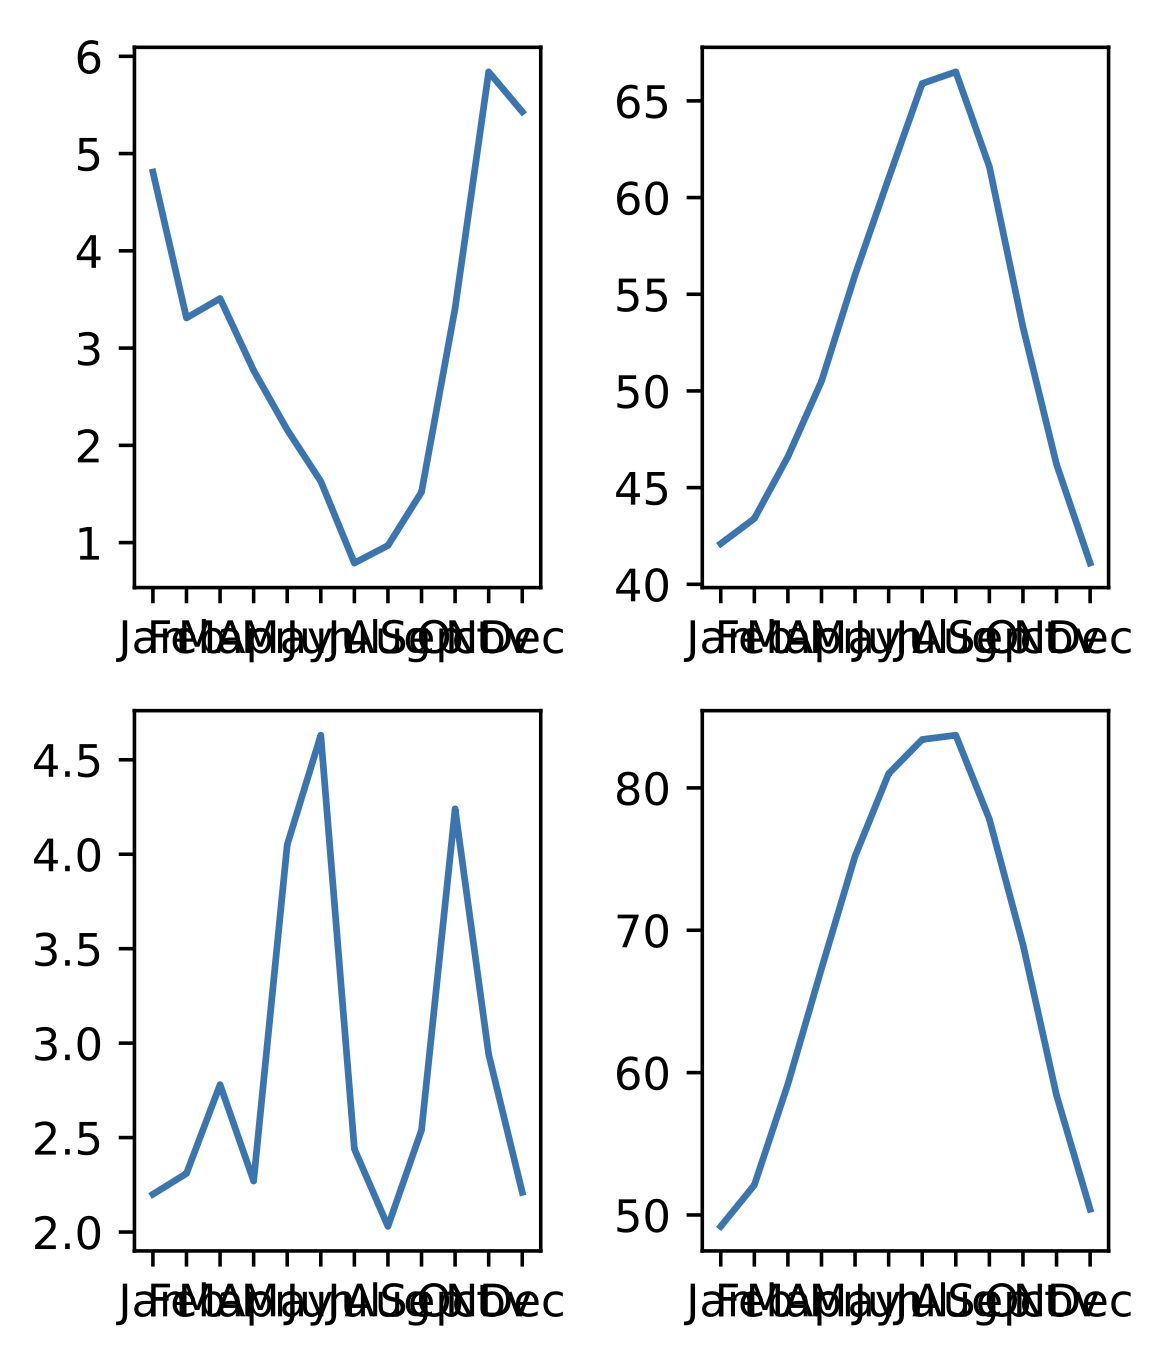

###Small multiples with shared y axis

In [ ]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation data in the top axes
ax[0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'], color = 'b')
ax[0].plot(seattle_weather['MONTH'], seattle_weather["MLY-PRCP-25PCTL"], color = 'b', linestyle = '--')
ax[0].plot(seattle_weather['MONTH'], seattle_weather["MLY-PRCP-75PCTL"], color = 'b', linestyle = '--')

# Plot Austin precipitation data in the bottom axes
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'], color = 'r')
ax[1].plot(austin_weather['MONTH'], austin_weather["MLY-PRCP-25PCTL"], color = 'r', linestyle = '--')
ax[1].plot(austin_weather['MONTH'], austin_weather["MLY-PRCP-75PCTL"], color = 'r', linestyle = '--')

plt.show()

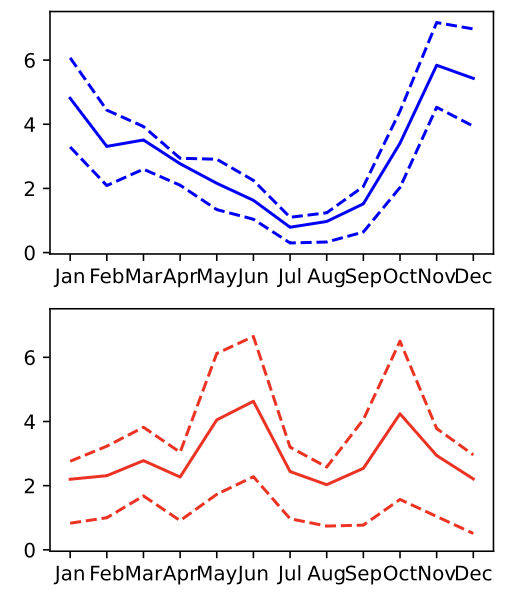

##Plotting time-series data

###Read data with a time index

In [ ]:
import pandas as pd

# Read the data from file using read_csv
climate_change = pd.read_csv('climate_change.csv', parse_dates = True, index_col='date')

###Plot time-series data

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index,climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel("Time")

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()

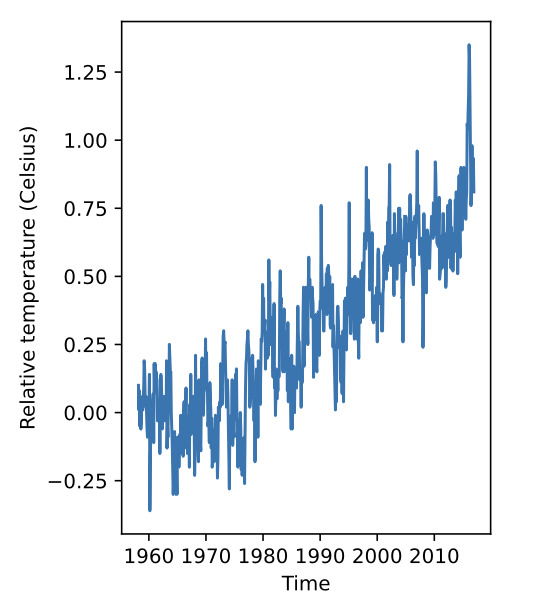

Using a time index to zoom in

In [ ]:
import matplotlib.pyplot as plt

# Use plt.subplots to create fig and ax
fig,ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01":"1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

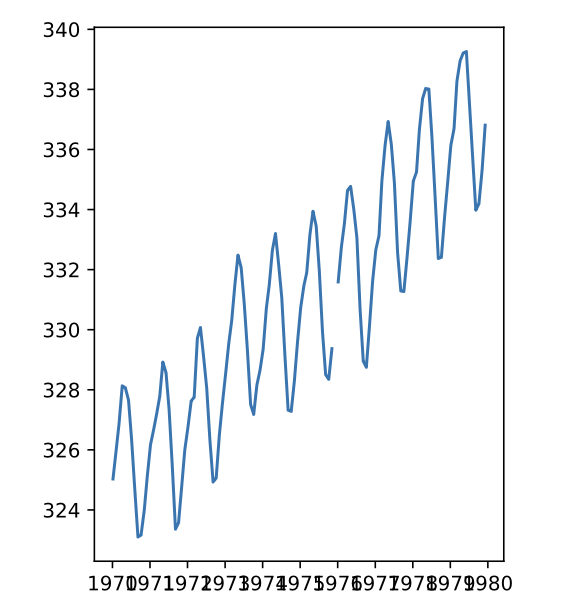

##Plotting time-series with different variables

###Plotting two variables

In [ ]:
import matplotlib.pyplot as plt

# Initalize a Figure and Axes
fig,ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change['co2'], color='b')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change['relative_temp'], color='r')

plt.show()

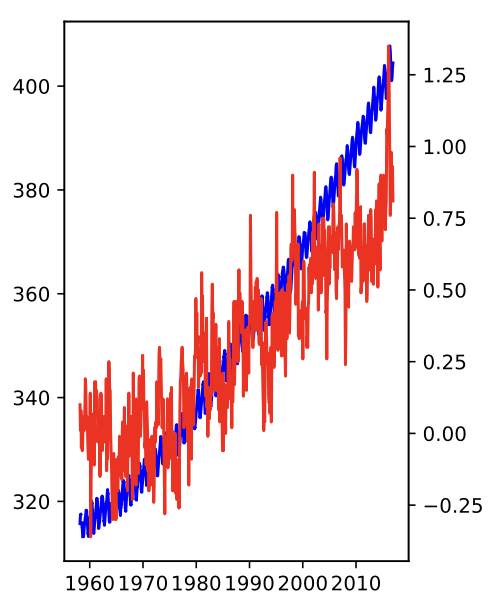

###Defining a function that plots time-series data

In [ ]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

###Using a plotting function

In [ ]:
#plot_timeseries(axes, x, y, color, xlabel, ylabel)

fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], "blue", 'Time (years)', "CO2 levels")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax, climate_change.index, climate_change['relative_temp'], "red", "Time (years)", "Relative temperature (Celsius)")

plt.show()

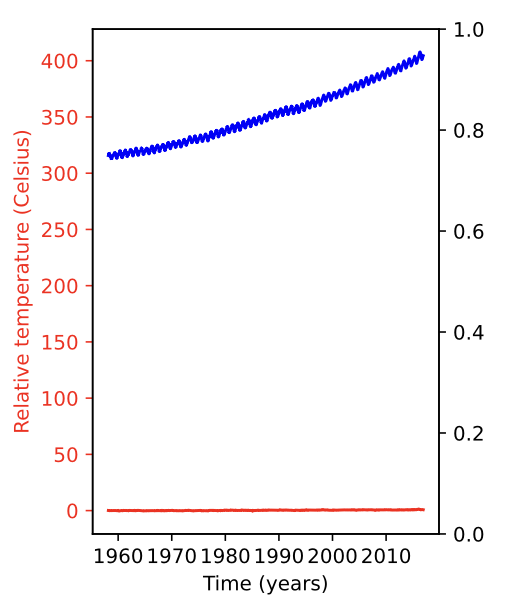

##Annotating time-series data

###Annotating a plot of time-series data

In [ ]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(climate_change.index, climate_change['relative_temp'])

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate('>1 degree', xy=(pd.Timestamp('2015-10-06'), 1))

plt.show()

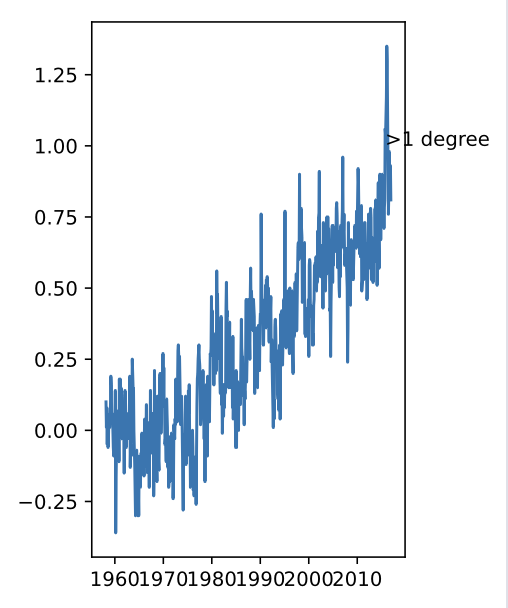

###Plotting time-series: putting it all together

In [ ]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', "Time (years)", "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', "Time (years)", "Relative temp (Celsius)")

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), arrowprops={"arrowstyle":"->", "color":"gray"})


plt.show()

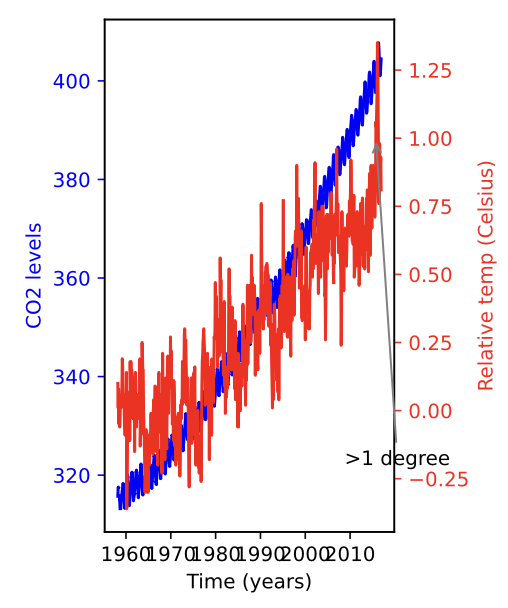

##Quantitative comparisons: bar-charts

###Bar chart

In [ ]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index,medals['Gold'])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel("Number of medals")

plt.show()

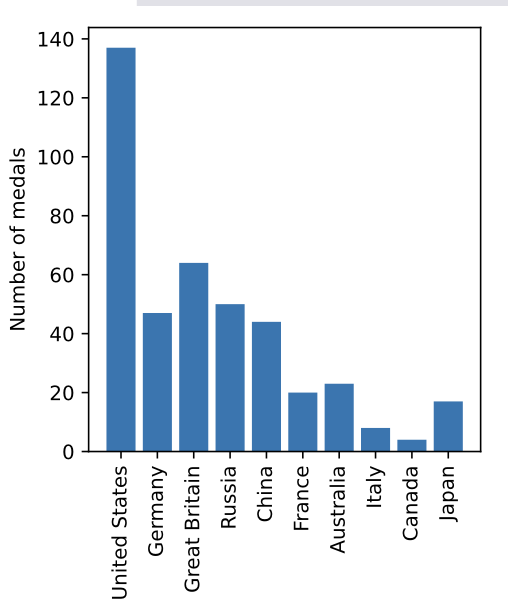

###Stacked bar chart
A stacked bar chart contains bars, where the height of each bar represents values. In addition, stacked on top of the first variable may be another variable. The additional height of this bar represents the value of this variable. And you can add more bars on top of that.

In [ ]:
# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals['Gold'], label="Gold")

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals['Silver'], bottom=medals['Gold'], label="Silver")

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals["Bronze"], bottom=medals["Gold"]+medals["Silver"], label="Bronze")

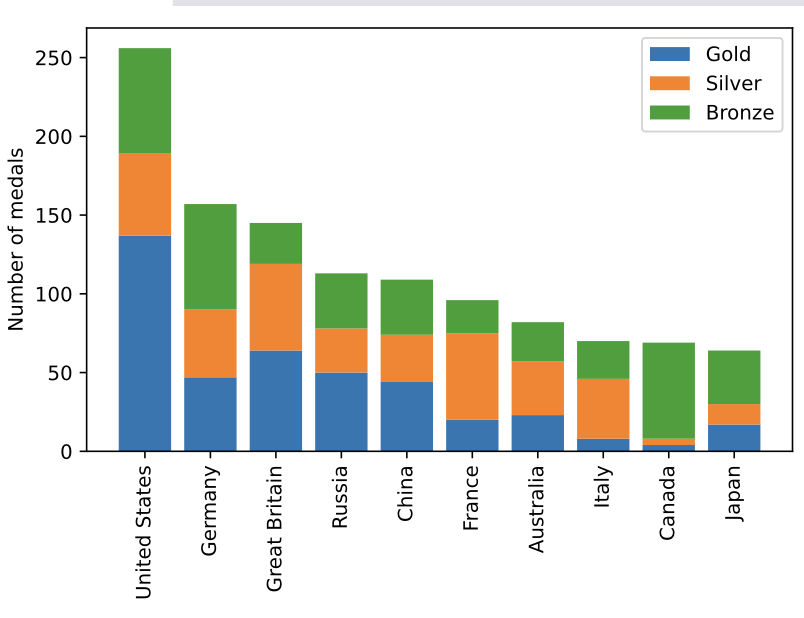

##Quantitative comparisons: histograms

###Creating histograms
Histograms show the full distribution of a variable.

In [ ]:
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'])

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'])

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel("Weight (kg)")

# Set the y-axis label to "# of observations"
ax.set_ylabel("# of observations")

plt.show()

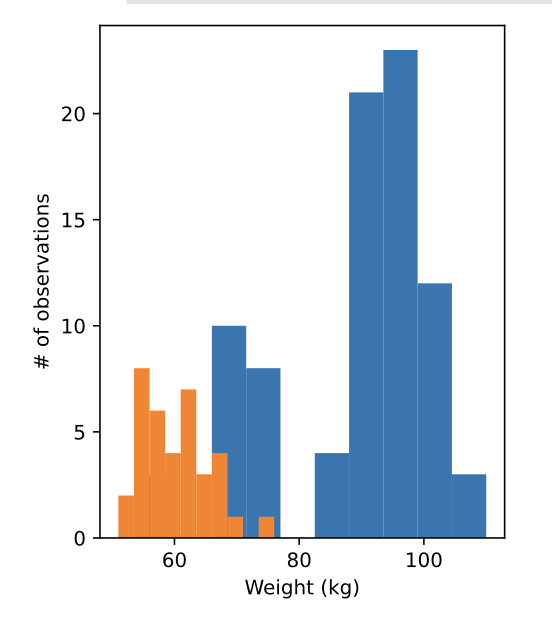

###"Step" histogram
Histograms allow us to see the distributions of the data in different groups in our data.

In [ ]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing["Weight"], label="Rowing", histtype='step', bins=5) 

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics["Weight"], label="Gymnastics", histtype='step', bins=5)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

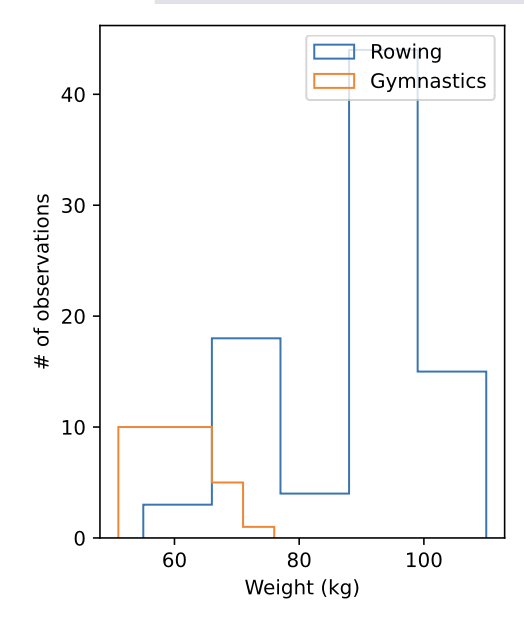

##Statistical plotting

###Adding error-bars to a bar chart
Statistical plotting techniques add quantitative information for comparisons into the visualization. For example, in this exercise, we will add error bars that quantify not only the difference in the means of the height of medalists in the 2016 Olympic Games, but also the standard deviation of each of these groups, as a way to assess whether the difference is substantial relative to the variability within each group.



In [ ]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing["Height"].mean(), yerr=mens_rowing["Height"].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics["Height"].mean(), yerr=mens_gymnastics["Height"].std())


# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

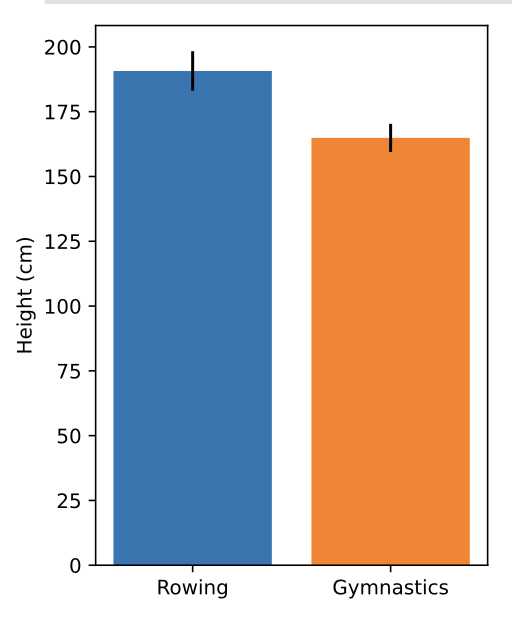

###Adding error-bars to a plot
Adding error-bars to a plot is done by using the errorbar method of the Axes object.

Here, you have two DataFrames loaded: seattle_weather has data about the weather in Seattle and austin_weather has data about the weather in Austin. Each DataFrame has a column "MONTH" that has the names of the months, a column "MLY-TAVG-NORMAL" that has the average temperature in each month and a column "MLY-TAVG-STDDEV" that has the standard deviation of the temperatures across years.

In the exercise, you will plot the mean temperature across months and add the standard deviation at each point as y errorbars.

In [ ]:
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"], yerr=seattle_weather["MLY-TAVG-STDDEV"])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"], yerr=austin_weather["MLY-TAVG-STDDEV"])

# Set the y-axis label
ax.set_ylabel("Temperature (Fahrenheit)")

plt.show()

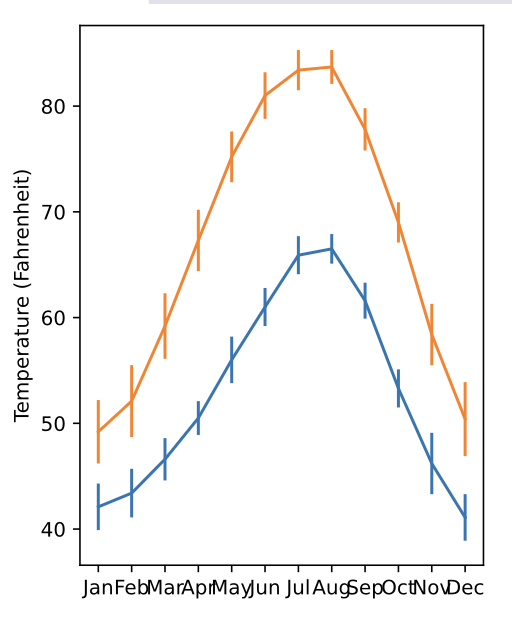

###Creating boxplots
Boxplots provide additional information about the distribution of the data that they represent. They tell us what the median of the distribution is, what the inter-quartile range is and also what the expected range of approximately 99% of the data should be. Outliers beyond this range are particularly highlighted.



In [ ]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing["Height"], mens_gymnastics["Height"]])

# Add x-axis tick labels:
ax.set_xticklabels(["Rowing", "Gymnastics"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

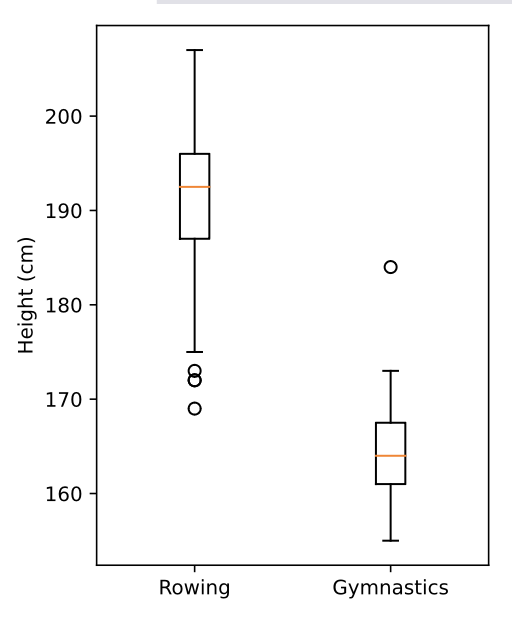

##Quantitative comparisons: scatter plots

###Simple scatter plot
Scatter are a bi-variate visualization technique. They plot each record in the data as a point. The location of each point is determined by the value of two variables: the first variable determines the distance along the x-axis and the second variable determines the height along the y-axis.

In [ ]:
fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate_change["co2"], climate_change["relative_temp"])

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()

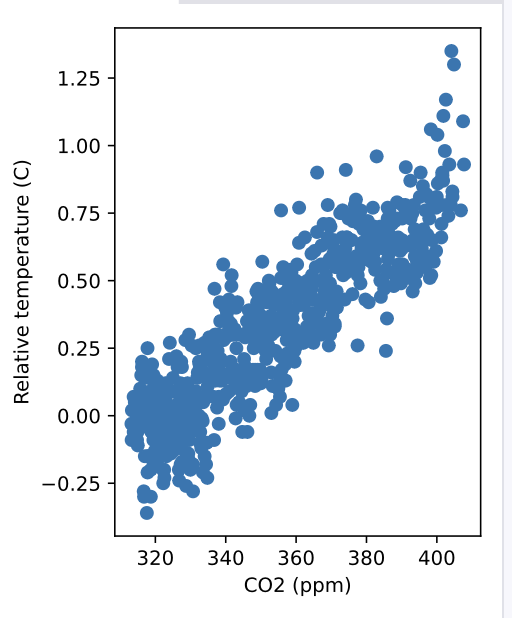

###Encoding time by color
The screen only has two dimensions, but we can encode another dimension in the scatter plot using color. Here, we will visualize the climate_change dataset, plotting a scatter plot of the "co2" column, on the x-axis, against the "relative_temp" column, on the y-axis. We will encode time using the color dimension, with earlier times appearing as darker shades of blue and later times appearing as brighter shades of yellow.

In [ ]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change["co2"], climate_change["relative_temp"], c=climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()

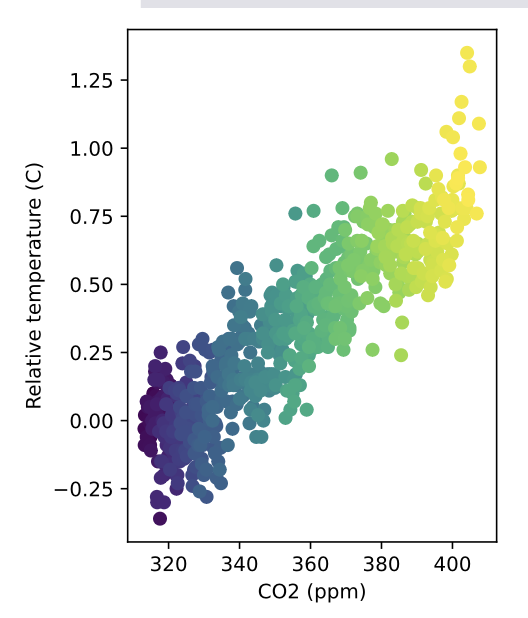

##Preparing your figures to share with others

###Switching between styles
Selecting a style to use affects all of the visualizations that are created after this style is selected.



In [ ]:
# Use the "ggplot" style and create new Figure/Axes
plt.style.use("ggplot")
fig,ax = plt.subplots()
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])
plt.show()

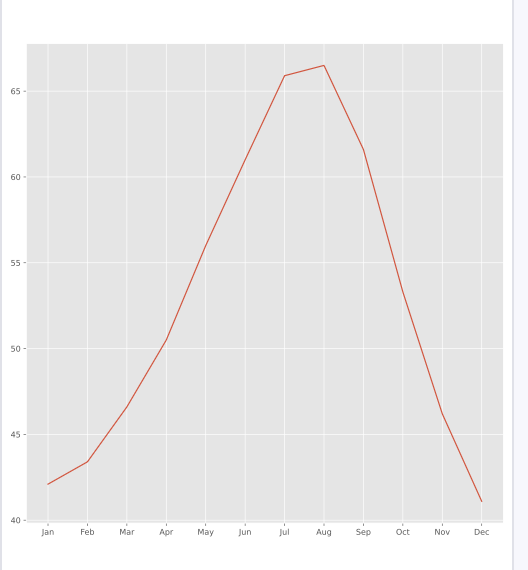

##Saving your visualizations

###Saving a file several times
If you want to share your visualizations with others, you will need to save them into files. Matplotlib provides as way to do that, through the savefig method of the Figure object.

In [ ]:
# Save as a PNG file
fig.savefig("my_figure.png")
# Save as a PNG file with 300 dpi
fig.savefig("my_figure_300dpi.png",dpi=300)

###Save a figure with different sizes

Set the figure size as width of 3 inches and height of 5 inches and save it as 'figure_3_5.png' with default resolution.


In [ ]:
# Set figure dimensions and save as a PNG
fig.set_size_inches([3,5])
fig.savefig("figure_3_5.png",dpi=300)



##Automating figures from data

###Unique values of a column
One of the main strengths of Matplotlib is that it can be automated to adapt to the data that it receives as input. For example, if you receive data that has an unknown number of categories, you can still create a bar plot that has bars for each category.

In [ ]:
# Extract the "Sport" column
sports_column = summer_2016_medals["Sport"]

# Find the unique values of the "Sport" column
sports = summer_2016_medals["Sport"].unique()

# Print out the unique sports values
print(sports)

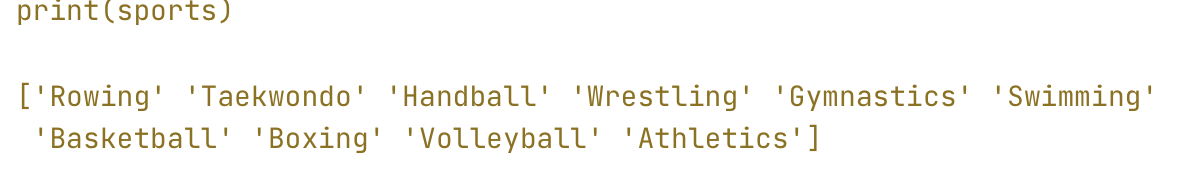

###Automate your visualization
One of the main strengths of Matplotlib is that it can be automated to adapt to the data that it receives as input. For example, if you receive data that has an unknown number of categories, you can still create a bar plot that has bars for each category.

In [ ]:
fig, ax = plt.subplots()

# Loop over the different sports branches
for sport in sports:
  # Extract the rows only for this sport
  sport_df = summer_2016_medals[summer_2016_medals["Sport"]==sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, sport_df["Weight"].mean(), yerr=sport_df["Weight"].std())

ax.set_ylabel("Weight")
ax.set_xticklabels(sports, rotation=90)

# Save the figure to file
fig.savefig("sports_weights.png")